In [44]:
import numpy as np
import pandas as pd

# KNeighborsClassifier
# RandomForestClassifier
# SGDClassifier + StratifiedKFold

In [45]:
heart_data = pd.read_csv("./heart.csv")
o2_saturation_data = pd.read_csv("./o2Saturation.csv")

In [46]:
# cp, restecg

heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
o2_saturation_data.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [48]:
heart_data.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

# heart_data_pre_train, heart_data_test = train_test_split(heart_data, 0.2)
# heart_data_train, heart_data_valid = train_test_split(heart_data_pre_train, 0.25)

# heart_data_train.head()

X = [1, 2, 4]
# heart_data.iloc[X]
heart_data.iloc[[0,1,2,3,4]]
total_len = len(heart_data)
np.random_seed = 11
permuted_indices = np.random.permutation(np.arange(total_len))

test_len = int(total_len * 0.2)
valid_len = int(total_len * 0.2)

test_indices = permuted_indices[:test_len]
valid_indices = permuted_indices[-valid_len:]
train_indices = permuted_indices[test_len:-valid_len]

test_heart_data = heart_data.iloc[test_indices]
test_y = heart_data[["output"]].iloc[test_indices]
test_y_data = test_y.values.ravel()

valid_heart_data = heart_data.iloc[valid_indices]
valid_y = heart_data[["output"]].iloc[valid_indices]
valid_y_data = valid_y.values.ravel()

train_heart_data = heart_data.iloc[train_indices]
train_y = heart_data[["output"]].iloc[train_indices]
train_y_data = train_y.values.ravel()

In [64]:
train_heart_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.046741,-0.106077,0.276344,0.274501,0.123111,-0.216265,-0.362837,0.108702,0.122557,-0.132801,0.265423,0.061840,-0.256019
sex,-0.046741,1.000000,-0.022921,-0.061341,-0.243915,0.003657,0.039632,-0.061927,0.189320,0.118966,-0.025673,0.094575,0.222637,-0.232317
cp,-0.106077,-0.022921,1.000000,0.027698,-0.079055,-0.001040,-0.026554,0.381968,-0.396254,-0.127691,0.158225,-0.209883,-0.223667,0.425349
trtbps,0.276344,-0.061341,0.027698,1.000000,0.125165,0.129709,-0.184357,-0.082321,0.091132,0.202555,-0.143831,0.127121,0.088956,-0.192171
chol,0.274501,-0.243915,-0.079055,0.125165,1.000000,0.091130,-0.196416,-0.083473,0.126159,-0.010600,0.010098,0.077089,0.103563,-0.107771
fbs,0.123111,0.003657,-0.001040,0.129709,0.091130,1.000000,-0.123760,-0.027078,0.026504,0.025224,-0.084321,0.175392,0.073233,-0.030269
restecg,-0.216265,0.039632,-0.026554,-0.184357,-0.196416,-0.123760,1.000000,0.095182,-0.120223,-0.139345,0.139353,-0.114268,-0.057792,0.191355
thalachh,-0.362837,-0.061927,0.381968,-0.082321,-0.083473,-0.027078,0.095182,1.000000,-0.376033,-0.276798,0.306215,-0.234073,-0.136340,0.450336
exng,0.108702,0.189320,-0.396254,0.091132,0.126159,0.026504,-0.120223,-0.376033,1.000000,0.272783,-0.214539,0.150744,0.258587,-0.399841
oldpeak,0.122557,0.118966,-0.127691,0.202555,-0.010600,0.025224,-0.139345,-0.276798,0.272783,1.000000,-0.532414,0.160251,0.283817,-0.384539


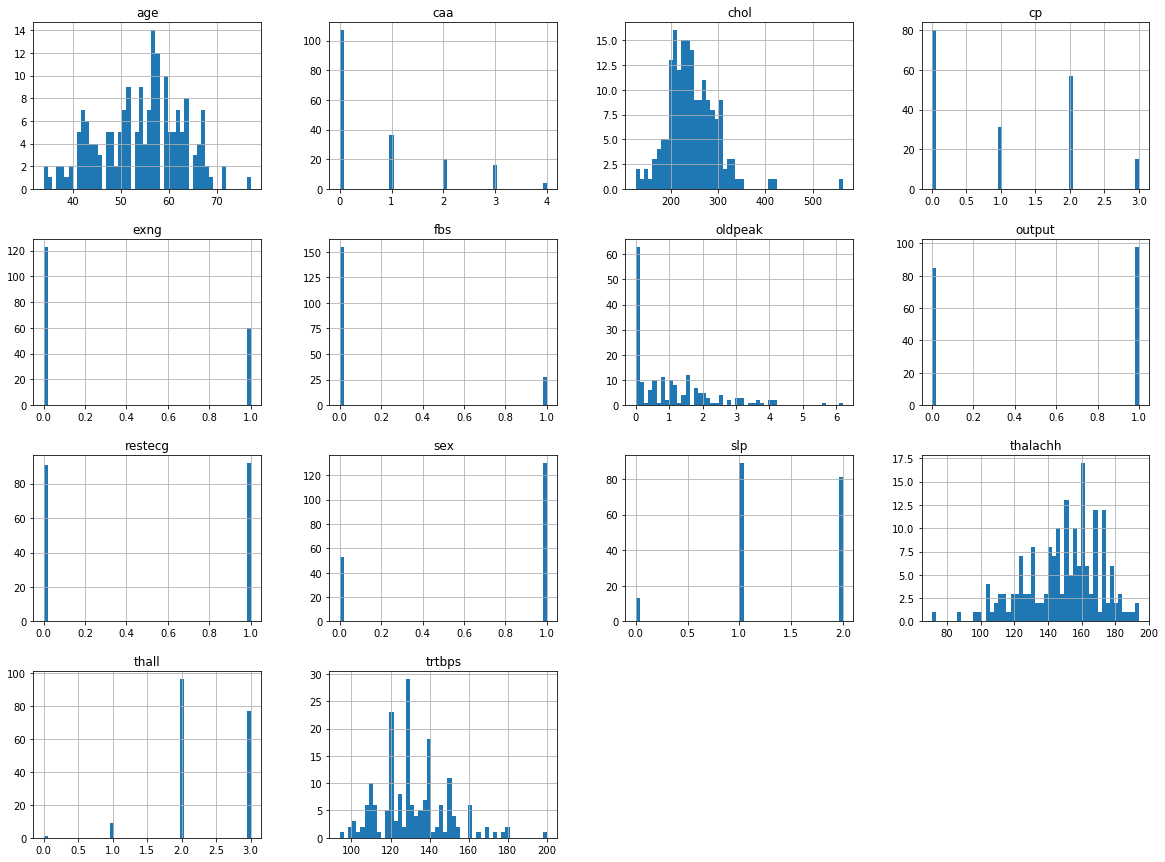

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
train_heart_data.hist(bins=50, figsize=(20,15))
# save_fig("attribute_heart_attack_plots")
plt.show()

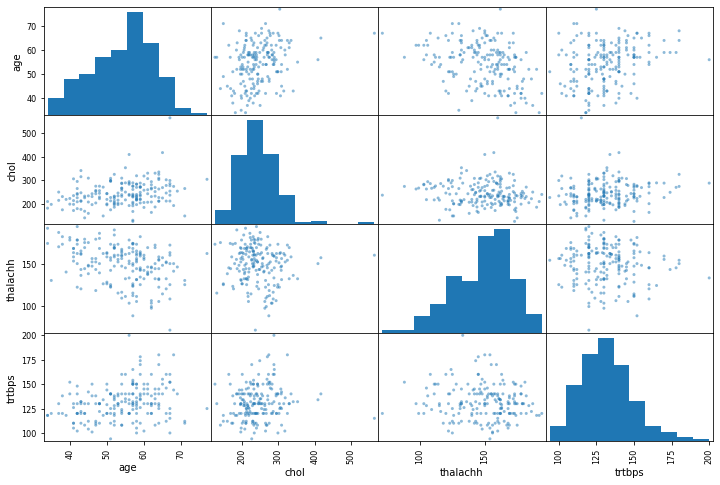

In [68]:
from pandas.plotting import scatter_matrix

attributes = ["age", "chol", "thalachh", "trtbps"]
scatter_matrix(train_heart_data[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")
plt.show()

In [86]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=11)
sgd_clf.fit(train_heart_data, train_y.values.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=11, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

valid_predictions = sgd_clf.predict(valid_heart_data)

valid_true = valid_y.values.ravel()

print(f"accuracy score: {accuracy_score(valid_true, valid_predictions)}")
print(f"precision score: {precision_score(valid_true, valid_predictions)}")
print(f"recall score: {recall_score(valid_true, valid_predictions)}")

accuracy score: 0.7
precision score: 0.8333333333333334
recall score: 0.5


In [96]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_heart_data, train_y_data, cv=3, scoring="accuracy")

array([0.59016393, 0.55737705, 0.59016393])

In [98]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=11)
forest_clf.fit(train_heart_data, train_y_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [ ]:
valid_forest_predictions = forest_clf.predict(valid_heart_data)

print(f"accuracy score: {accuracy_score(valid_y_data, valid_)}")